### SVM_Classification_(Linear)

Step 1: Data Load လုပ်ခြင်းနှင့် Feature များ သီးခြားခွဲထုတ်ခြင်း (Data Loading & Feature Selection)
-   Machine Learning Model မတည်ဆောက်မီ လိုအပ်တဲ့ Dataset ကို ဖတ်ယူပြီး၊ ခန့်မှန်းတွက်ချက်မယ့် အချက်အလက် (Features) နဲ့ အဖြေ (Target) ကို သီးခြားစီ ခွဲထုတ်လိုက်ခြင်း ဖြစ်ပါတယ်။

In [ ]:
import pandas as pd

# Data Load လုပ်ခြင်း
df = pd.read_csv(r'C:\Users\MSI\Desktop\Git_Project\AI_2026\Day07 SVM\example\heart_(SVM).csv')
X = df.drop('target', axis=1)
y = df['target']

Step 2: Data ကို အုပ်စုခွဲခြင်း (Train/Test Split)

In [ ]:
from sklearn.model_selection import train_test_split

# Train/Test Split လုပ်ခြင်း
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3: အချက်အလက်များကို စံသတ်မှတ်ချက်အတွင်း ညှိယူခြင်း (Feature Scaling)
-   SVM Algorithm သည် Data များ၏ အကွာအဝေး (Distance) ပေါ်မူတည်၍ အလုပ်လုပ်သောကြောင့် ယူနစ်မတူညီသော Data များကို စံနှုန်းတစ်ခုတည်းဖြစ်အောင် ညှိယူပေးခြင်း ဖြစ်ပါတယ်။

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling (SVM အတွက် မရှိမဖြစ်လိုအပ်ပါတယ်)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 4: Linear SVM Model တည်ဆောက်ခြင်းနှင့် Training ပေးခြင်း (Model Building & Training)
-   Hyperparameter C=2.0: 'C' သည် Regularization parameter ဖြစ်ပါတယ်။ (C တန်ဖိုးကို ကစားကြည့်ပါ။)
-   ဤတန်ဖိုးက Model ကို "မှားယွင်းမှု ဘယ်လောက် လက်ခံမလဲ" ဆိုတာကို ထိန်းချုပ်ပေးပါတယ်။

In [16]:
from sklearn.svm import SVC

# Linear SVM Model တည်ဆောက်ခြင်း
linear_model = SVC(kernel='linear', C=2.0) 
linear_model.fit(X_train, y_train)

SVC(C=2.0, kernel='linear')

Step 5: Model ၏ တိကျမှုကို စစ်ဆေးခြင်း (Model Evaluation)
-   ယခုအဆင့်မှာတော့ Model ကို မမြင်ဖူးသေးတဲ့ Test Data တွေပေးပြီး ခန့်မှန်းခိုင်းမှာဖြစ်ပြီး၊ ထွက်ပေါ်လာတဲ့ အဖြေတွေဟာ တကယ်တမ်း ရှိနေတဲ့ အဖြေမှန်တွေနဲ့ ဘယ်လောက်အထိ ကိုက်ညီမှုရှိလဲဆိုတာကို ရာခိုင်နှုန်းနဲ့ တွက်ချက်စစ်ဆေးမှာ ဖြစ်ပါတယ်။

In [15]:
from sklearn.metrics import accuracy_score

# ရလဒ်ထုတ်ကြည့်ခြင်း
y_pred = linear_model.predict(X_test)
print("--- Linear SVM Result ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%\n")

--- Linear SVM Result ---
Accuracy Score: 81.46%



Step 6: အရေးပါသော အချက်အလက်များကို ရှာဖွေခြင်းနှင့် ပုံဖော်ခြင်း (Feature Importance & Visualization)
-   Linear SVM Model ရဲ့ ဆုံးဖြတ်ချက်အပေါ်မှာ ဘယ် Feature (ဥပမာ - အသက်၊ ရင်ဘတ်အောင့်ခြင်း) တွေက အကျိုးသက်ရောက်မှု အရှိဆုံးလဲဆိုတာကို Coefficients တန်ဖိုးတွေကတစ်ဆင့် တွက်ချက်ကြည့်ခြင်း ဖြစ်ပါတယ်။

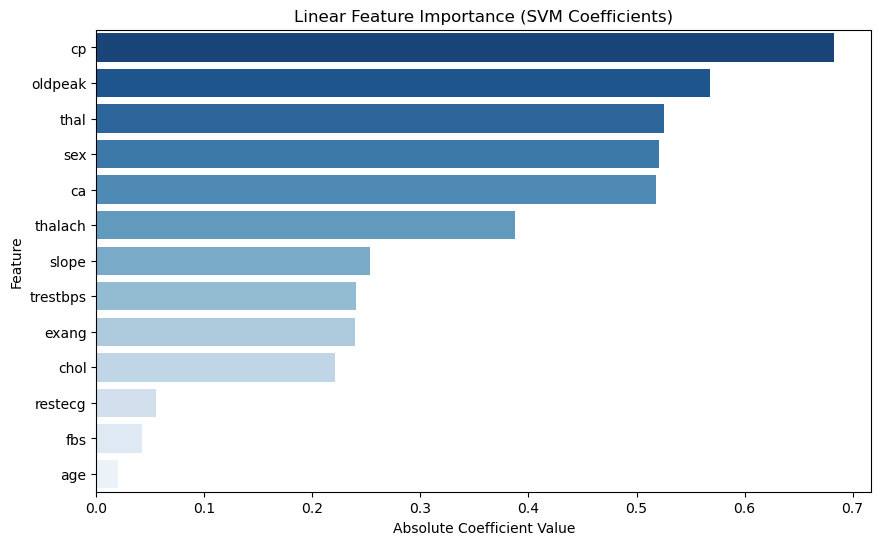

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


linear_importance = np.abs(linear_model.coef_[0])
feat_importance = pd.DataFrame({'Feature': X.columns, 'Importance': linear_importance})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Visualization 
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feat_importance, 
    hue='Feature', 
    palette='Blues_r', 
    legend=False
)

plt.title('Linear Feature Importance (SVM Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.show()


Step 7: အချက်အလက်များ၏ အရေးပါမှုကို ဇယားဖြင့် အသေးစိတ်ကြည့်ရှုခြင်း (Feature Importance Table)

In [9]:
# ဇယားပုံစံဖြင့် ထုတ်ပြခြင်း
print("--- Feature Importance Table ---")
print(feat_importance)

--- Feature Importance Table ---
     Feature  Importance
2         cp    0.683071
9    oldpeak    0.567618
12      thal    0.524966
1        sex    0.520981
11        ca    0.518105
7    thalach    0.387067
10     slope    0.253270
3   trestbps    0.240056
8      exang    0.239299
4       chol    0.221219
6    restecg    0.055530
5        fbs    0.042691
0        age    0.019893
